# Listening Analysis

Combining Spotify & Last.fm data for exploring habits and trends
Uses two data sources,

1. Last.fm scrobbles
2. Spotify audio features

The two are joined by searching Last.fm tracks on Spotify to get a Uri, the track name and artist name are provided for the query.
These Uris can be used to retrieve Spotify feature descriptors. `all_joined()` gets a BigQuery of that joins the scrobble time series with their audio features and provides this as a panda frame.

In [14]:
scrobbles.dtypes

track                object
album                object
artist               object
time                 object
uri                  object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [4]:
scrobbles.describe()[1:]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
mean,0.170649,0.589141,2.422924e+05,0.711968,0.213591,5.328584,0.216903,-7.127309,0.581856,0.146982,124.640429,3.957806,0.418024
std,0.246679,0.173905,1.220714e+05,0.204289,0.335353,3.673929,0.173524,3.646891,0.493257,0.136440,30.809049,0.356726,0.236941
min,0.000000,0.000000,1.578700e+04,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004320,0.470000,1.893220e+05,0.586000,0.000000,2.000000,0.099900,-8.590000,0.000000,0.047500,97.805000,4.000000,0.221000
50%,0.045500,0.599000,2.264410e+05,0.749000,0.001100,6.000000,0.141000,-6.472000,1.000000,0.080800,124.992000,4.000000,0.398000
75%,0.237000,0.724000,2.787440e+05,0.878000,0.394000,9.000000,0.300000,-4.827000,1.000000,0.223000,143.188000,4.000000,0.597000
max,0.996000,0.981000,4.995315e+06,0.999000,0.995000,11.000000,0.995000,3.108000,1.000000,0.966000,248.028000,5.000000,0.983000


In [15]:
scrobbles.sort_values(by="time", ascending=False)

,track,album,artist,time,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
34017,Blackbird - Gorgon City Remix,Blackbird EP,Joeski,2020-12-31 18:35:28+00:00,spotify:track:3eGyeq8R8PscX1d13c9eJP,0.000542,0.803,389834,0.857,0.840,4,0.0787,-7.273,0,0.0449,125.016,4,0.2230
81549,Lanterns - Dead Man's Chest Remix,Lanterns / Lanterns (Dead Man's Chest Remix),Tim Reaper,2020-12-31 18:28:13+00:00,spotify:track:3lc7wN7T29s7uRbPZR0hTH,0.001530,0.537,440255,0.868,0.877,10,0.5730,-7.319,0,0.0618,157.015,4,0.2650
46080,ID Check - Original Mix,Toolroom Ibiza 2019,Ben A,2020-12-31 18:22:07+00:00,spotify:track:4x94xmQhUnd59k8oGM7AkG,0.001720,0.809,372614,0.982,0.911,6,0.0657,-8.690,0,0.0460,123.992,4,0.8240
43376,Up & Down,Emotion EP,Purple Disco Machine,2020-12-31 17:52:23+00:00,spotify:track:11DRarpv190YnCAXt85uFA,0.032000,0.758,409961,0.913,0.739,5,0.0304,-6.712,1,0.0518,117.997,4,0.7230
73918,Cuatro,Tomahawk EP,Mystic State,2020-12-31 17:00:28+00:00,spotify:track:6JBKvAWsMvo68a9pMa9Ujn,0.040300,0.621,342866,0.680,0.803,9,0.2890,-10.943,0,0.0484,139.989,4,0.2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74391,Julia,Void,RL Grime,2017-11-03 03:35:27+00:00,spotify:track:4or82pWT9zvQNIoGckZiYb,0.003340,0.573,301429,0.932,0.744,9,0.1120,-5.158,0,0.0500,168.008,4,0.1610
61000,Site Zero / The Vault,Void,RL Grime,2017-11-03 03:28:51+00:00,spotify:track:762ME2OHjuGo4xTbfZhpok,0.683000,0.289,464015,0.404,0.854,7,0.3280,-12.815,0,0.0352,92.873,4,0.0285
32139,Reminder (feat. How To Dress Well),Void,RL Grime,2017-11-03 02:54:37+00:00,spotify:track:2JUdMBlA5JzuemLGzZNDrf,0.683000,0.593,260075,0.560,0.109,3,0.1040,-7.059,0,0.0447,113.895,4,0.3630
78339,Monsoon,Void,RL Grime,2017-11-03 02:50:23+00:00,spotify:track:0jYAtTuRsRdHMuvaOXIAj5,0.034600,0.546,254815,0.850,0.680,10,0.1120,-3.366,0,0.0386,161.996,4,0.3020


# Rap

## Descriptor Stats

In [10]:
rap = get_playlist("RAP", spotnet)
rap_frame = pd.merge(track_frame(rap.tracks), scrobbles, on=['track', 'artist']) # FILTER SCROBBLES
rap_frame = rap_frame.sort_values(by="time", ascending=False) # SORT
rap_frame = rap_frame.loc[:, descriptor_headers] # DESCRIPTORS

total_time = rap_frame["duration_ms"].sum() / (1000 * 60 * 60 * 24)
print(f'{total_time:.0f} days spent listening since Nov. 2017')

rap_frame.describe()[1:]

28 days spent listening since Nov. 2017


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
mean,0.179491,0.654732,217263.266814,0.711093,0.007111,5.231103,0.243851,-6.739009,0.653965,0.275643,120.313818,4.008950,0.465955
std,0.182540,0.149069,60534.505476,0.142709,0.047975,3.752245,0.167658,2.351719,0.475725,0.128600,31.569949,0.252267,0.222555
min,0.000063,0.261000,81967.000000,0.274000,0.000000,0.000000,0.033300,-17.485000,0.000000,0.037800,61.113000,1.000000,0.027200
25%,0.039900,0.546000,180893.000000,0.604000,0.000000,1.000000,0.114000,-8.324000,0.000000,0.186000,91.973000,4.000000,0.293000
50%,0.130000,0.668000,208013.000000,0.720000,0.000000,6.000000,0.184000,-6.553000,1.000000,0.282000,120.051000,4.000000,0.457000
75%,0.253000,0.759000,245200.000000,0.821000,0.000035,8.000000,0.339000,-5.146000,1.000000,0.362000,140.144000,4.000000,0.628000
max,0.864000,0.975000,774920.000000,0.993000,0.847000,11.000000,0.979000,-1.354000,1.000000,0.827000,207.982000,5.000000,0.961000


# Playlist Comparisons

In [13]:
playlist_names = ["RAP", "EDM", "ROCK", "METAL", "JAZZ", "POP"]
playlists = [get_playlist(i, spotnet) for i in playlist_names]

filtered_playlists = [pd.merge(track_frame(i.tracks), scrobbles, on=['track', 'artist']) for i in playlists]
filtered_playlists = [i.drop_duplicates(['uri']) for i in filtered_playlists]
filtered_playlists = [i.loc[:, float_headers] for i in filtered_playlists]

playlist_mean = [i.mean() for i in filtered_playlists]
playlist_std = [i.std() for i in filtered_playlists]

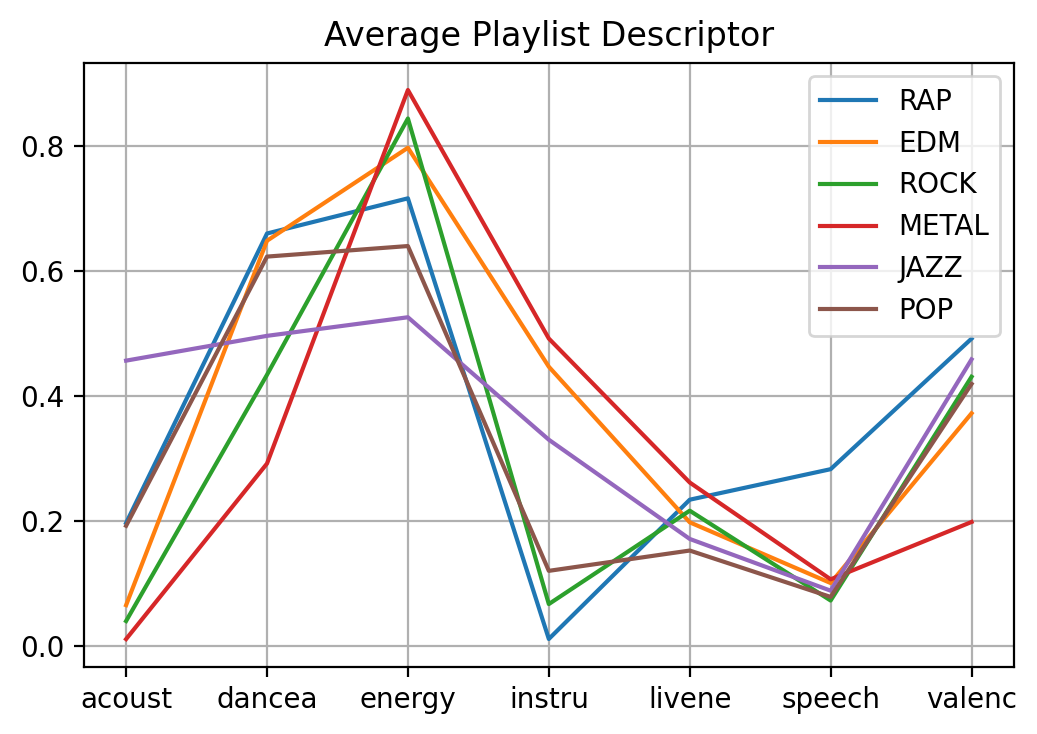

In [14]:
x_pos = [i for i, _ in enumerate(float_headers)]
for playlist, mean, std in zip(filtered_playlists, playlist_mean, playlist_std):
    plt.plot(x_pos, mean)
    
plt.legend(playlist_names)
plt.xticks(x_pos, [i[:6] for i in float_headers])
plt.title('Average Playlist Descriptor')
plt.grid()
plt.show()

# Imports & Setup

In [5]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

from analysis.net import get_spotnet, get_playlist, track_frame
from analysis.query import *
from analysis import descriptor_headers, float_headers

import pandas as pd

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'

## Read Scrobble Frame

In [2]:
scrobbles = all_joined(limit=-1) # load dataset as panda frame

In [2]:
scrobbles = pd.read_csv(cache, sep='\t', index_col=0)

## Write Scrobble Frame

In [ ]:
scrobbles.to_csv(cache, sep='\t')